In [ ]:
print("Nguyễn Nguyên Huy - 6351071030")

Nguyễn Nguyên Huy - 6351071030


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
import requests
%matplotlib inline

In [ ]:
def download_dog_image():

    url = 'https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjs01MaEdrygrKBGpEwH-O3lyMaJM28FglN62WhCGybOhlMFdrWKjebFYRS2V9fSqO1-hHoWAU0NgfmlLgLt3ZD1Rt4_cAq3xAJdVM4uirFQ_BTf7kiTDjz_Izw05xZqbq5JFxewFbqKpM/s640/ScreenShot6858.jpg'

    print(f"Đang tải ảnh từ: {url}")
    response = requests.get(url)

    with open('dog.jpg', 'wb') as f:
        f.write(response.content)
    print("Đã tải xong và lưu thành công file 'dog.jpg'!")

Đang tải ảnh từ: https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjs01MaEdrygrKBGpEwH-O3lyMaJM28FglN62WhCGybOhlMFdrWKjebFYRS2V9fSqO1-hHoWAU0NgfmlLgLt3ZD1Rt4_cAq3xAJdVM4uirFQ_BTf7kiTDjz_Izw05xZqbq5JFxewFbqKpM/s640/ScreenShot6858.jpg
Đã tải xong và lưu thành công file 'dog.jpg'!


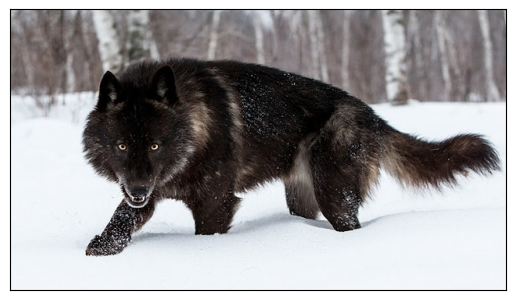

In [ ]:
download_dog_image()
image = Image.open('dog.jpg')
axes = plt.axes(xticks=[], yticks=[])
axes.imshow(image)

In [ ]:
imarr = np.array(image)
rows = imarr.shape[0]
cols = imarr.shape[1]

data = imarr / 255.0
data = data.reshape(rows * cols, 3)
data.shape

(231680, 3)

In [ ]:
kmeans = KMeans(n_clusters=32, max_iter=300)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

Text(0.5, 1.0, '32-color Image')

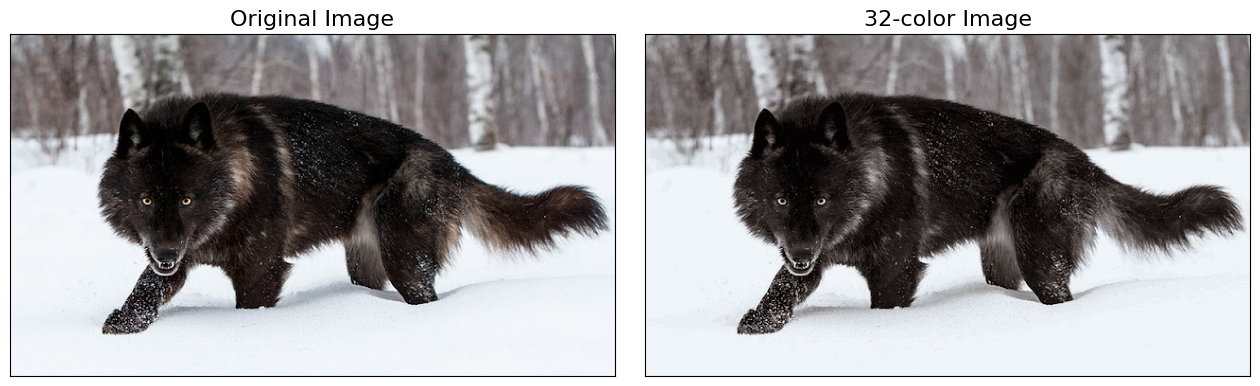

In [13]:
img_recolored = new_colors.reshape(imarr.shape)

fig, ax = plt.subplots(1,2,figsize=(16,6),
                      subplot_kw = dict(xticks=[], yticks=[]))
fig,plt.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title('Original Image', fontsize=16)
ax[1].imshow(img_recolored)
ax[1].set_title('32-color Image', fontsize=16)

In [14]:
img_recolored = img_recolored * 255
new_img = Image.fromarray(img_recolored.astype(np.uint8))
new_img.save('compressed_img2.png')